# Bias, Variance, Irreducible error

Можно показать, что ошибка любой модели раскладывается в сумму трех компонент:

$$ \large \text{Model error} = \text{Bias} + \text{Variance} + \text{Irreducible error} $$

## Bias

Обычно высокий **bias** имеют модели, которые недостаточно сложны по сравнению с реальной закономерностью данных. Например, реальная зависимость, которую мы наблюдаем, нелинейная, а мы пытаемся аппроксимировать ее прямой линией. В этом случае наше решение заведомо смещено (biased) в сторону линейной модели, и мы будем систематически ошибаться в сравнении с реальной моделью данных.

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L03/out/high_bias.png" width="600"/></center>




## Variance

Можно получить и обратную ситуацию. Если модель будет слишком сложная (в смысле своей выразительной способности) и "гибкая", то она сможет подстроиться под данные и выучить тренировочную выборку полностью. В этом случае модель будет подстраиваться под любой шум в данных и пытаться объяснить его какой-то сложной закономерностью.

Малое изменение в данных будет приводить к большим изменениям в прогнозе модели.

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L03/out/high_variance.png" width="600"/></center>

Иногда **bias** и **variance** представляют еще таким образом:


1. Можно быть точным и попадать всегда в центр мишени — это соответствует низкому **bias** и низкому **variance**.
2. Можно попадать примерно в центр мишени, но при этом с большим разбросом — низкий **bias**, но высокий **variance**.
3. Можно стрелять кучно, но не в центр — это высокий **bias** и низкий **variance**.
4. Можно просто стрелять наугад — это высокий **bias** и высокий **variance**.

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L03/out/low_hight_bias_variance.png" width="450"/></center>

## Irreducible error

Если удачно подобрать модель и ее гиперпараметры, то гипотетически можно точно предсказать среднее значение ожидаемой величины, то есть получить и низкий **bias**, и низкий **variance**.

В реальности при измерении физической величины есть случайные непредсказуемые погрешности — отклонения от среднего. Из-за этого предсказания всегда будут иметь определенный уровень ошибки, ниже которого опуститься нельзя — это и есть **irreducible error**.




<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L03/out/low_bias_low_variance.png" width="600"/></center>

## Bias vs variance

В практических задачах, когда невозможно подобрать реальную модель данных, не получается бесконечно уменьшать и **bias**, и **variance** — приходится искать компромисс (bias-variance tradeoff). С какого-то момента при уменьшении **bias** начнет увеличиваться **variance**, и наоборот. Задача исследователя — найти точку оптимума.

Можно построить зависимость этих величин от сложности модели (capacity). По мере увеличения сложности **variance** имеет тенденцию к возрастанию, а **bias** — к убыванию. Более сложные модели подстраиваются под случайные шумы обучающей выборки, а более простые — не могут воспроизвести реальные закономерности.


<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L03/out/bias_variance_tradeoff.png" width="450"/></center>

Управлять эффектом **variance** и **bias** можно как с помощью выбора модели, так и с помощью выбора гиперпараметров модели.

Продемонстрируем источники компонент **bias** и **variance** на примере решения задачи регрессии зашумленной косинусоиды с помощью решающих деревьев. Создадим функцию для генерации небольшой обучающей выборки и отобразим ее на графике:

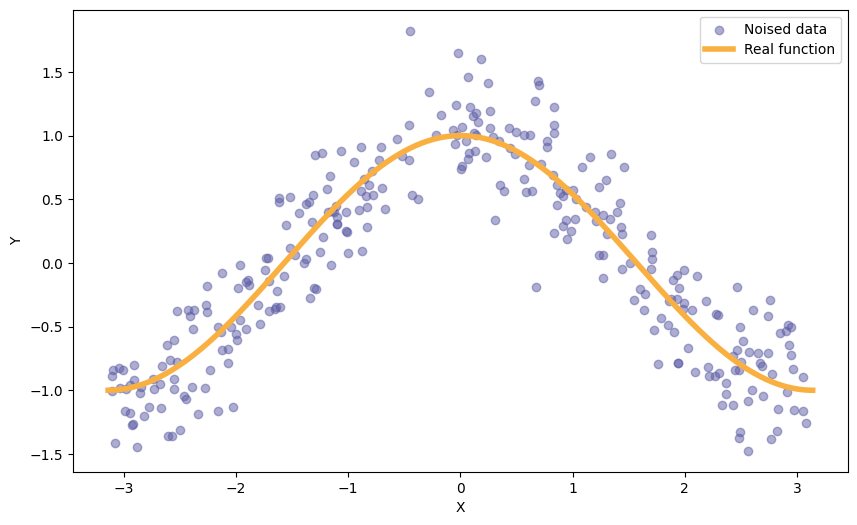

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

num_points = 300
num_grid = 500
x_max = 3.14
plt.figure(figsize=(10, 6))


def get_sample(num_points, x_max, std=0.3, x_sample=None):
    if x_sample is None:
        x_sample = (np.random.rand(num_points) - 0.5) * 2 * x_max
    y_sample = np.cos(x_sample.flatten()) + np.random.randn(x_sample.shape[0]) * std
    return x_sample.reshape(-1, 1), y_sample


x_grid = np.linspace(-x_max, x_max, num_grid).reshape(-1, 1)
x_sample, y_sample = get_sample(num_points=num_points, x_max=x_max)
_, y_true = get_sample(num_points=num_points, x_max=x_max, std=0, x_sample=x_grid)

plt.scatter(x_sample, y_sample, c="#5D5DA6", alpha=0.5, label="Noised data")
plt.plot(x_grid, y_true, "#F9B041", linewidth=4, label="Real function")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

Обучим три решающих дерева максимальной глубины (параметр `max_depth=None`) на разных выборках. Сравним предсказания моделей друг с другом и с реальной целевой функцией.

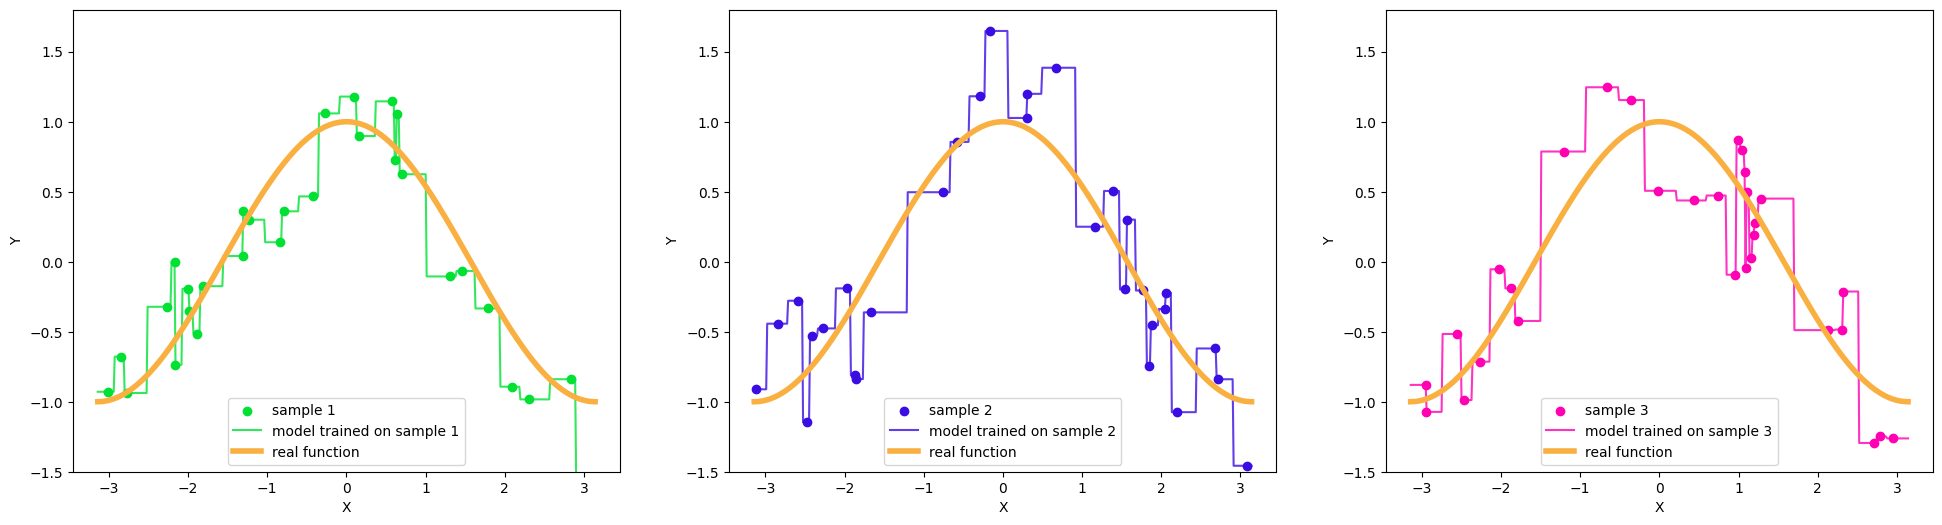

In [ ]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)

num_points = 30
num_models = 3
plt.figure(figsize=(24, 6))

model = DecisionTreeRegressor(max_depth=None)
y_pred = np.zeros((num_models, num_grid))
sample_color = ["#00E134", "#3A0DE2", "#FF00B3"]
for model_num in range(num_models):
    x_sample, y_sample = get_sample(num_points=num_points, x_max=x_max)
    model.fit(x_sample, y_sample)
    y_pred[model_num] = model.predict(x_grid)
    _, y_true = get_sample(num_points=num_points, x_max=x_max, std=0, x_sample=x_grid)

    plt.subplot(1, 3, model_num + 1)
    plt.scatter(
        x_sample, y_sample, c=sample_color[model_num], label=f"sample {model_num+1}"
    )
    plt.plot(
        x_grid,
        y_pred[model_num],
        c=sample_color[model_num],
        alpha=0.8,
        label=f"model trained on sample {model_num+1}",
    )
    plt.plot(x_grid, y_true, "#F9B041", linewidth=4, label="real function")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.ylim(-1.5, 1.8)
    plt.legend(loc="lower center")

Предсказания моделей отличаются друг от друга и от истинной кривой средних значений косинуса.

Обучим 1000 моделей c разной глубиной ($1, 5$ и максимальной) на разных подвыборках наших данных. Выберем одну тестовую точку $x=0$ и посмотрим, как предсказания моделей в этой точке распределены относительно истинного значения моделируемой функции.

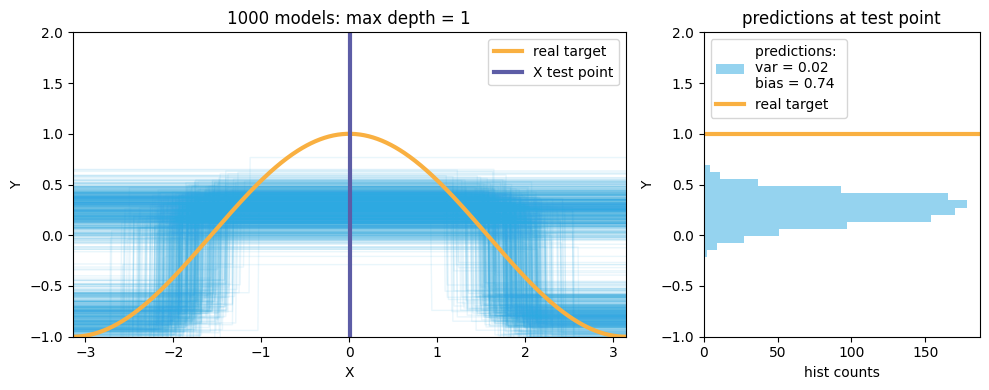

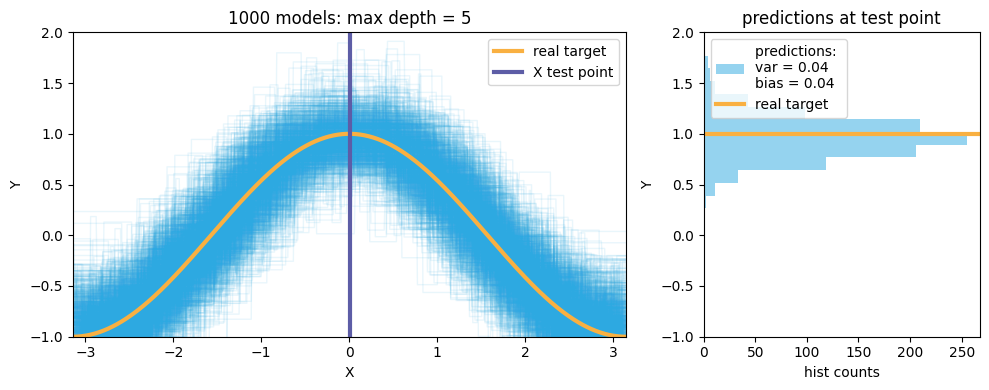

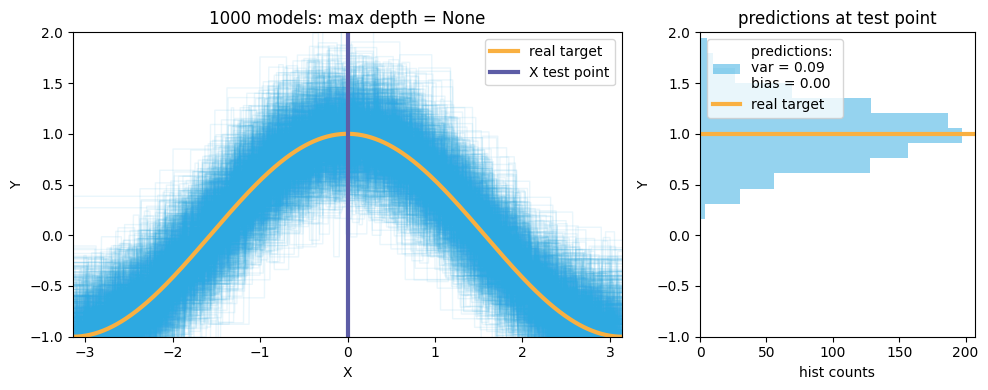

In [ ]:
import matplotlib.gridspec as gridspec

num_models = 1000

for max_depth in [1, 5, None]:
    model = DecisionTreeRegressor(max_depth=max_depth)

    y_pred = np.zeros((num_models, num_grid))

    plt.figure(figsize=(10, 4))
    gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1])
    plt.subplot(gs[0])

    for model_num in range(num_models):
        x_sample, y_sample = get_sample(num_points=num_points, x_max=x_max)
        model.fit(x_sample, y_sample)
        y_pred[model_num] = model.predict(x_grid)
        plt.plot(x_grid, y_pred[model_num], alpha=0.1, c="#2DA9E1", linewidth=1)

    _, y_true = get_sample(num_points=num_points, x_max=x_max, std=0, x_sample=x_grid)
    plt.plot(x_grid, y_true, c="#F9B041", linewidth=3, label="real target")
    plt.axvline(x=x_grid[num_grid // 2], c="#5D5DA6", linewidth=3, label="X test point")
    plt.xlim((-x_max, x_max))
    plt.ylim((-1, 2))
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.gca().set_title(f"{num_models} models: max depth = {max_depth}")
    plt.legend(loc="upper right")

    plt.subplot(gs[1])
    var = y_pred[:, num_grid // 2].var()
    bias = np.abs(y_true[num_grid // 2] - y_pred[:, num_grid // 2].mean())
    plt.hist(
        y_pred[:, num_grid // 2],
        bins=15,
        color="#2DA9E1",
        alpha=0.5,
        orientation="horizontal",
        label=f"predictions: \nvar = {var:.2f}\nbias = {bias:.2f}",
    )
    plt.axhline(y=y_true[num_grid // 2], c="#F9B041", linewidth=3, label="real target")
    plt.ylim((-1, 2))
    plt.xlabel("hist counts")
    plt.ylabel("Y")
    plt.gca().set_title(f"predictions at test point")
    plt.legend(loc="upper left")
    plt.tight_layout()
    plt.show()

По мере увеличения глубины дерева:
- уменьшается абсолютное значение сдвига среднего значения предсказаний моделей относительно истинного значения (bias) — в среднем предсказания моделей становятся более точными,
- увеличивается дисперсия предсказаний моделей (variance) — предсказания моделей становятся менее устойчивы и сильнее зависят от конкретной обучающей выборки.

Деревья малой глубины имеют малую сложность и высокий bias.

Деревья большой глубины имеют высокую сложность и высокий variance.

Можно подобрать для дерева идеальную capacity, когда bias и variance будут суммарно давать наименьший вклад в ошибку. Этим мы занимаемся при подборе параметров.
Но есть и другие способы борьбы с variance и/или bias, которые используются в таких алгоритмах как случайный лес и градиентный бустинг.